In [1]:
# Importing required libraries. 

# pandas,numpy,warning,os,datetime,math,random numbers ,tests 
import os 
import numpy as np
import pandas as pd
import warnings
from collections import Counter# used to keep track of elements and their count
from datetime import datetime
from math import sin, cos, sqrt, atan2, radians
from scipy.stats import chi2_contingency
from random import randrange, uniform

# For data visualizations 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set working directory ---------------------------------------------------
os.chdir("E:/EDWISOR/Project/Cab_Fare_Project")

In [3]:
# Cross check working directory ---------------------------------------------------
os.getcwd()

'E:\\EDWISOR\\Project\\Cab_Fare_Project'

In [4]:
# Load data ---------------------------------------------------
Train_Cab = pd.read_csv("train_cab.csv")

In [5]:
# Explore the data  -------------------------------------------------------

In [6]:
# Check class of the data
type(Train_Cab)

pandas.core.frame.DataFrame

In [7]:
# Check the dimensions(no of rows and no of columns)
Train_Cab.shape

(16067, 7)

In [8]:
# Check names of dataset(no need of renaming variables)
Train_Cab.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
# Check top(first) rows of dataset 
Train_Cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [10]:
# Check bottom(last) rows of dataset 
Train_Cab.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [11]:
#Check structure of dataset(data structure of each variable)
Train_Cab.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [12]:
# Check summary of dataset 
Train_Cab.describe()## By looking at summary we can say that there are many anomolies in datset 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [13]:
# Variable Identification 

# In this dataset fare_amount is our target variable & rest all variables are independent variables fare_amount is a continous variabe 
Train_Cab['fare_amount'].head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: object

In [14]:
# Data type conversion

# fare_amount,pickup_datetime  

In [15]:
# First, we will go for converting our fare_amount variable from object to numeric data type

Train_Cab['fare_amount'] = pd.to_numeric(Train_Cab['fare_amount'], errors = "coerce") 

In [16]:
Train_Cab['fare_amount'].dtypes

dtype('float64')

In [17]:
# when we tried convert pickup_datetime variable to date format it was throwing error coz of a starnge value in the variable
# So first treat it as NA and drop 

Train_Cab.loc[Train_Cab['pickup_datetime'] == '43' ,'pickup_datetime'] = np.nan  

Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab['pickup_datetime'].isnull()].index, axis = 0)


# Now lets convert pickup_datetime

Train_Cab['pickup_datetime'] =  pd.to_datetime(Train_Cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [18]:
Train_Cab.dtypes # we can see out pickupdate time is converted to date format

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [19]:
# Let us see our data after data type conversion of variables

Train_Cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [20]:
# Lets cross check our data after spitting pickup_date variable

Train_Cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [21]:
# Missing Value Analysis --------------------------------------------------

In [22]:
# Total number of missing values present in whole datset 
Train_Cab.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [23]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(Train_Cab.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_values'})

#Calculate percentage
missing_val['Missing_Value_Percentage'] = (missing_val.Missing_values/len(Train_Cab))*100

#descending order
missing_val = missing_val.sort_values('Missing_Value_Percentage',ascending=False).reset_index(drop=True)

In [24]:
missing_val

,Variables,Missing_values,Missing_Value_Percentage
0,passenger_count,55,0.342338
1,fare_amount,25,0.155608
2,pickup_datetime,0,0.000000
3,pickup_longitude,0,0.000000
4,pickup_latitude,0,0.000000
5,dropoff_longitude,0,0.000000
6,dropoff_latitude,0,0.000000


In [25]:
# Lets drop the observations with missing values 
Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab['passenger_count'].isnull()].index,axis = 0)
Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab['fare_amount'].isnull()].index,axis = 0)

In [26]:
# Lets check dimensions of our data after removing NA's

Train_Cab.shape

(15986, 7)

In [27]:
# Feature engineering -----------------------------------------------------

In [28]:
# Lets split the pickup_date time variable into year, month, date, day, hour, minute.

Train_Cab['year'] =Train_Cab['pickup_datetime'].dt.year

Train_Cab['month'] = Train_Cab['pickup_datetime'].dt.month

Train_Cab['date'] = Train_Cab['pickup_datetime'].dt.day

Train_Cab['day'] = Train_Cab['pickup_datetime'].dt.dayofweek

Train_Cab['hour'] = Train_Cab['pickup_datetime'].dt.hour


In [29]:
Train_Cab = Train_Cab.drop('pickup_datetime',axis=1)

In [30]:
Train_Cab.shape

(15986, 11)

In [31]:
Train_Cab.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7


In [32]:
# Lets check summary again after new feature creation
Train_Cab.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
count,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000,15986.000000
mean,15.030453,-72.464352,39.915577,-72.463909,39.898671,2.623272,2011.729138,6.262542,15.672589,3.034155,13.498436
std,431.213944,10.573594,6.829028,10.570256,6.186375,60.892140,1.864090,3.447766,8.683416,1.968748,6.520900
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992144,40.734935,-73.991182,40.734647,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981691,40.752603,-73.980168,40.753549,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.966817,40.767353,-73.963644,40.768005,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


In [33]:
Train_Cab.shape

(15986, 11)

In [34]:
# Outlier analysis --------------------------------------------------------

In [35]:
# Save numeric names
cnames =['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

fare_amount


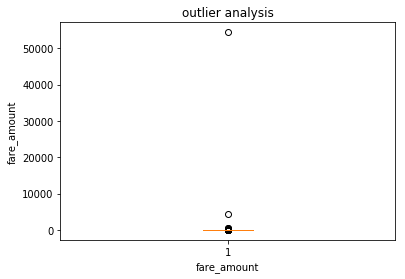

pickup_longitude


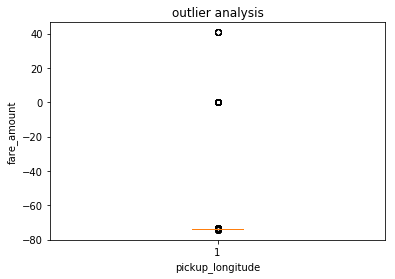

pickup_latitude


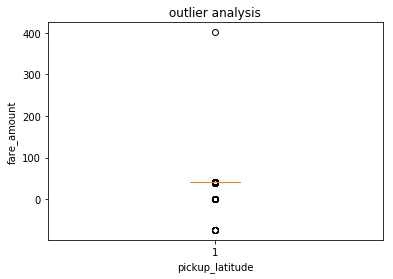

dropoff_longitude


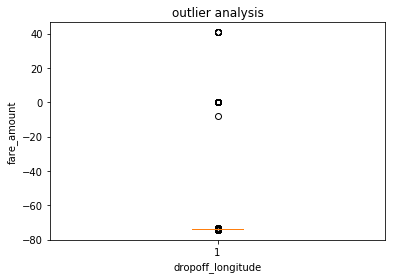

dropoff_latitude


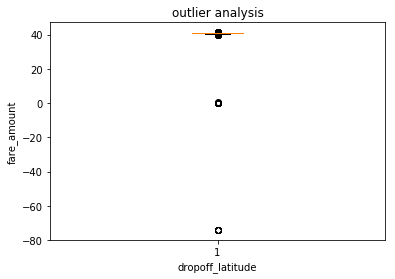

passenger_count


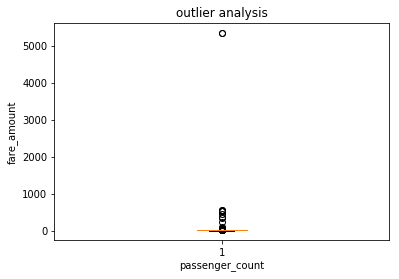

In [36]:
# Plot boxplot to visualize Outliers
#  For numeric variables
import matplotlib.pyplot as plt

%matplotlib inline

for i in cnames:
    print(i)
    plt.boxplot(Train_Cab[i])
    plt.xlabel(i)
    plt.ylabel('fare_amount')
    plt.title('outlier analysis')
    plt.show() 
    

In [37]:
######## fare_amount ##########

In [38]:
# Let use describe function to check min max values and identify outliers 
Train_Cab['fare_amount'].describe() # We can observe the max value as 54343 and min as -3. It clearly defines outliers. 

count    15986.000000
mean        15.030453
std        431.213944
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [39]:
# fare_amount 

# Quartiles and IQR

q25,q75 = np.percentile(Train_Cab['fare_amount'],[25,75])

IQR = q75-q25

# Lower and upper limits 

LL = q25 - (1.5 * IQR)

UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimum values 

Train_Cab.loc[Train_Cab['fare_amount'] < LL ,'fare_amount'] = LL  
Train_Cab.loc[Train_Cab['fare_amount'] > UL ,'fare_amount'] = UL 

In [40]:
# after treating outliers we have some negative values and zeros 
# Replace less than oe equal to 0 values with average fare amount value 
#delete observation with value 0.01

Train_Cab.loc[Train_Cab.fare_amount <= 0,'fare_amount'] = np.nan
Train_Cab.loc[Train_Cab.fare_amount == 0.01,'fare_amount'] = np.nan

Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab['fare_amount'].isnull()].index, axis = 0)


In [41]:
Train_Cab['fare_amount'].describe()

count    15981.000000
mean        10.065562
std          5.459774
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max         22.250000
Name: fare_amount, dtype: float64

In [42]:
# pickup_longitude
# Longitude must range between -180 to 180

In [43]:
Train_Cab['pickup_longitude'].describe()

count    15981.000000
mean       -72.463889
std         10.575215
min        -74.438233
25%        -73.992142
50%        -73.981689
75%        -73.966824
max         40.766125
Name: pickup_longitude, dtype: float64

In [44]:
# Quartiles and IQR

q25,q75 = np.percentile(Train_Cab['pickup_longitude'],[25,75])

IQR = q75-q25

# Lower and upper limits 

LL = q25 - (1.5 * IQR)

UL = q75 + (1.5 * IQR)

# Max of this variable is 40.77 which we can consider as outlier and capping with UL

Train_Cab.loc[Train_Cab['pickup_longitude'] < LL ,'pickup_longitude'] = LL  
Train_Cab.loc[Train_Cab['pickup_longitude'] > UL ,'pickup_longitude'] = UL 

In [45]:
# pickup_lattitude

In [46]:
Train_Cab['pickup_latitude'].describe() # we can see a value 401.08 which we can consider as outlier / max value is out of range.

count    15981.000000
mean        39.915328
std          6.830082
min        -74.006893
25%         40.734938
50%         40.752615
75%         40.767363
max        401.083332
Name: pickup_latitude, dtype: float64

In [47]:
# Quartiles and IQR

q25,q75 = np.percentile(Train_Cab['pickup_latitude'],[25,75])

IQR = q75-q25

# Lower and upper limits 

LL = q25 - (1.5 * IQR)

UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimu values 

Train_Cab.loc[Train_Cab['pickup_latitude'] < LL ,'pickup_latitude'] = LL  
Train_Cab.loc[Train_Cab['pickup_latitude'] > UL ,'pickup_latitude'] = UL  

In [48]:
Train_Cab['pickup_latitude'].describe() 

count    15981.000000
mean        40.750294
std          0.025829
min         40.686300
25%         40.734938
50%         40.752615
75%         40.767363
max         40.816001
Name: pickup_latitude, dtype: float64

In [49]:
# Dropoff longitude

In [50]:
Train_Cab['dropoff_longitude'].describe()

count    15981.000000
mean       -72.463445
std         10.571877
min        -74.429332
25%        -73.991182
50%        -73.980167
75%        -73.963646
max         40.802437
Name: dropoff_longitude, dtype: float64

In [51]:
# Quartiles and IQR

q25,q75 = np.percentile(Train_Cab['dropoff_longitude'],[25,75])

IQR = q75-q25

# Lower and upper limits 

LL = q25 - (1.5 * IQR)

UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimu values 

Train_Cab.loc[Train_Cab['dropoff_longitude'] < LL,'dropoff_longitude'] = LL
Train_Cab.loc[Train_Cab['dropoff_longitude'] > UL,'dropoff_longitude'] = UL

In [52]:
# dropoff_lattitude

In [53]:
Train_Cab['dropoff_latitude'].describe()

count    15981.000000
mean        39.898418
std          6.187326
min        -74.006377
25%         40.734663
50%         40.753563
75%         40.768011
max         41.366138
Name: dropoff_latitude, dtype: float64

In [54]:
# Quartiles and IQR

q25,q75 = np.percentile(Train_Cab['dropoff_latitude'],[25,75])

IQR = q75-q25

# Lower and upper limits 

LL = q25 - (1.5 * IQR)

UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimu values 

Train_Cab.loc[Train_Cab['dropoff_latitude'] < LL ,'dropoff_latitude'] = LL  
Train_Cab.loc[Train_Cab['dropoff_latitude'] > UL ,'dropoff_latitude'] = UL  

In [55]:
# passenger_count

In [56]:
Train_Cab['passenger_count'].describe() # we can see outlier as 5345 which is never possible practically 
# we can have passenger count max to max 6 no's

count    15981.000000
mean         2.623592
std         60.901659
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [57]:
# Quartiles and IQR

q25,q75 = np.percentile(Train_Cab['passenger_count'],[25,75])

IQR = q75-q25

# Lower and upper limits 

LL = round(q25 - (1.5 * IQR))

UL = round(q75 + (1.5 * IQR))

# Capping with UL for maxmimum values 

Train_Cab.loc[Train_Cab['passenger_count'] < LL ,'passenger_count'] = LL  
Train_Cab.loc[Train_Cab['passenger_count'] > 6 ,'passenger_count'] = UL  

In [58]:
Train_Cab.loc[Train_Cab['passenger_count'] < 1 ,'passenger_count'] = np.nan

In [59]:
Train_Cab = Train_Cab.drop(Train_Cab[Train_Cab['passenger_count'].isnull()].index, axis = 0)

fare_amount


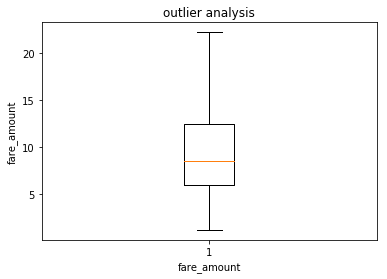

pickup_longitude


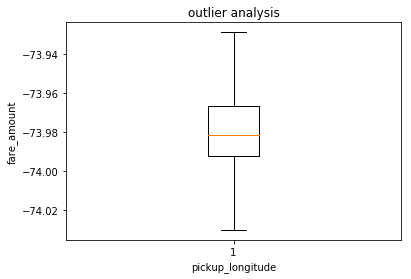

pickup_latitude


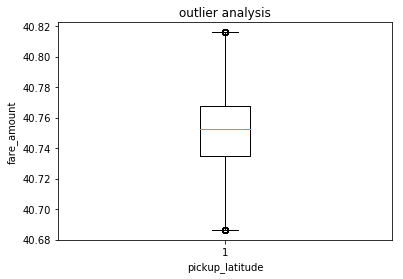

dropoff_longitude


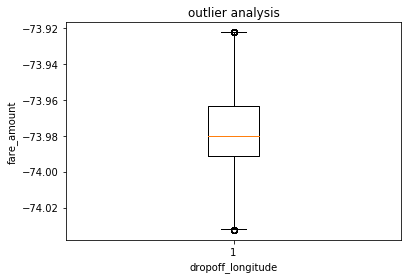

dropoff_latitude


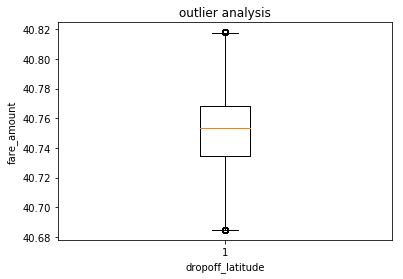

passenger_count


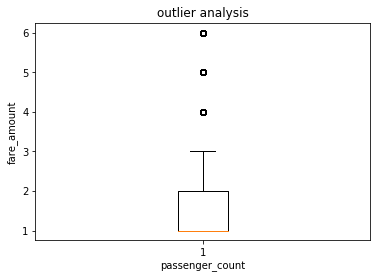

In [60]:
# Lets visualize boxplots again after outlier removal 

import matplotlib.pyplot as plt

%matplotlib inline

for i in cnames:
    print(i)
    plt.boxplot(Train_Cab[i])
    plt.xlabel(i)
    plt.ylabel('fare_amount')
    plt.title('outlier analysis')
    plt.show() 
    

In [61]:
# Lets check shape dataset after outlier removal 
Train_Cab.shape

(15923, 11)

In [62]:
Train_Cab.head() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1.0,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7


In [63]:

# Now, let's create distance using Haversine Formula 

# Calculates the geodesic distance between two points specified by

# radian latitude/longitude using the Haversine formula 

In [64]:
from math import radians, cos, sin, asin, sqrt

def distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    """
    Return distance along great radius between pickup and dropoff coordinates.
    """
    #Define earth radius (km)
    R_earth = 6371
    
    #Convert degrees to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(np.radians,
                                                             [pickup_lat, pickup_lon, 
                                                              dropoff_lat, dropoff_lon])
    #Compute distances along lat, lon dimensions
    dlat = dropoff_lat - pickup_lat
    dlon = dropoff_lon - pickup_lon
    
    #Compute haversine distance
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(dlon/2.0)**2
    
    return 2 * R_earth * np.arcsin(np.sqrt(a))

In [65]:
Train_Cab['distance'] = distance(Train_Cab['pickup_latitude'], 
                                     Train_Cab['pickup_longitude'],
                                     Train_Cab['dropoff_latitude'] ,
                                     Train_Cab['dropoff_longitude'])

In [66]:
Train_Cab.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1.0,2009,6,15,0,17,1.145091
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157


In [67]:
Train_Cab.shape

(15923, 12)

In [68]:
# Lets plot boxplot for distance variable 

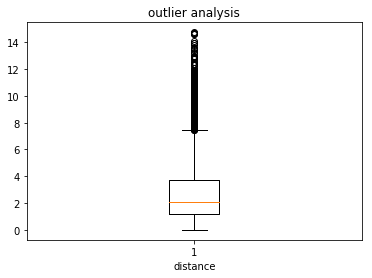

In [69]:
# Lets check is there any outliers in this distance variable using describe function

%matplotlib inline

plt.boxplot(Train_Cab['distance'])

plt.xlabel('distance')

plt.title('outlier analysis')

plt.show()

In [70]:
Train_Cab['distance'].describe() # we can see 0 and 8667.54 outliers

count    15923.000000
mean         2.788402
std          2.239064
min          0.000000
25%          1.200397
50%          2.094753
75%          3.710926
max         14.745183
Name: distance, dtype: float64

In [71]:
# we have some values less than 1 so instaed of deleting such observations

# we will replace these values with average distance of this data 

Train_Cab.loc[Train_Cab.distance < 1,'distance'] = Train_Cab['distance'].mean()


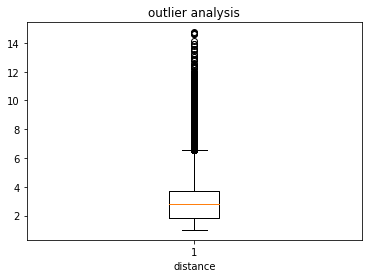

In [72]:
# Lets check the boxplot after removing outliers 
%matplotlib inline

plt.boxplot(Train_Cab['distance'])

plt.xlabel('distance')

plt.title('outlier analysis')

plt.show()

In [73]:
# The data left after all preprocessing 

# df = Train_Cab.copy()

# Train_Cab = df.copy()

In [74]:
Train_Cab.shape

(15923, 12)

In [75]:
Train_Cab.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1.0,2009,6,15,0,17,1.145091
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157


In [76]:
# Exploratory Analysis with visualizations after data  cleaning --------------------------------

In [77]:
Train_Cab.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'date', 'day', 'hour', 'distance'],
      dtype='object')

In [78]:
# Import ggplot library 
from ggplot import *

In [79]:
Train_Cab.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'date', 'day', 'hour', 'distance'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


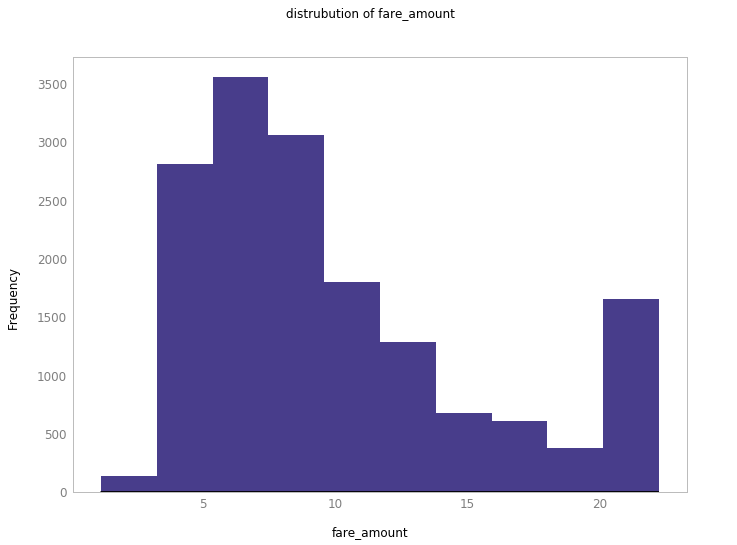

<ggplot: (-9223371849290046604)>

In [80]:
# Univariate Analysis 

# Histogram for continuous variables to check  distribution of each variable 

#  fare_amount 

ggplot(Train_Cab,aes(x='fare_amount')) + geom_histogram(fill="DarkSlateBlue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("fare_amount") + ylab("Frequency") +ggtitle("distrubution of fare_amount")+\
   theme(text=element_text(size=20)) 

#skewed

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


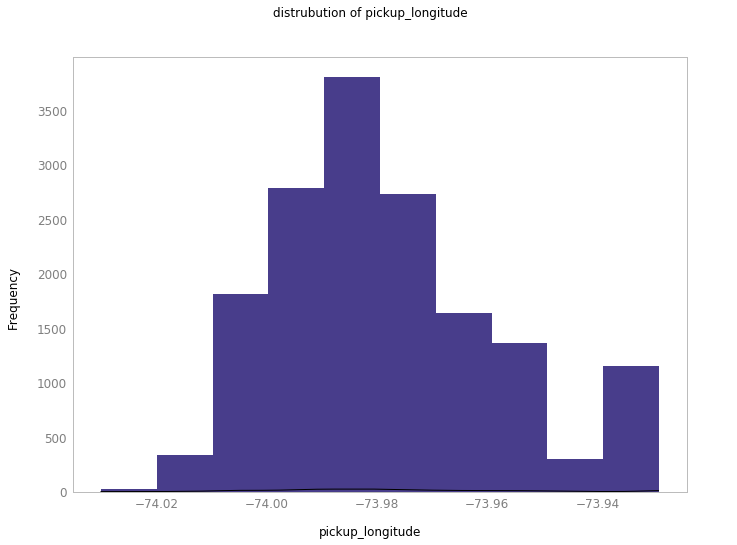

<ggplot: (187562677049)>

In [81]:
# pickup_longitude

ggplot(Train_Cab,aes(x='pickup_longitude')) + geom_histogram(fill="DarkSlateBlue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("pickup_longitude") + ylab("Frequency") +ggtitle("distrubution of pickup_longitude")+\
   theme(text=element_text(size=20))

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


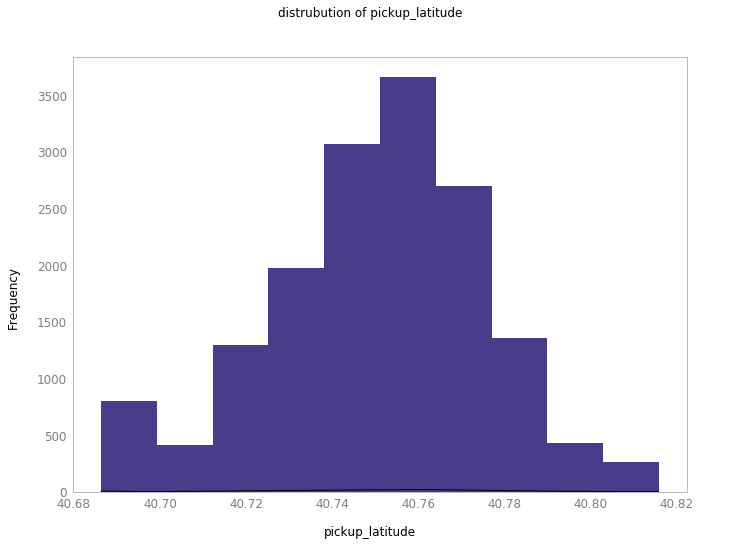

<ggplot: (187564758122)>

In [82]:
# pickup_latitude
ggplot(Train_Cab,aes(x='pickup_latitude')) + geom_histogram(fill="DarkSlateBlue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("pickup_latitude") + ylab("Frequency") +ggtitle("distrubution of pickup_latitude")+\
   theme(text=element_text(size=20)) 

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


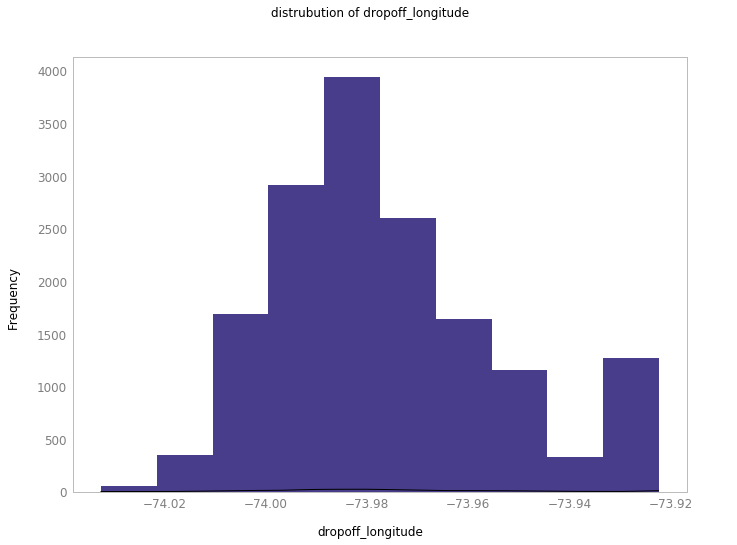

<ggplot: (187565050667)>

In [83]:
# dropoff_longitude
ggplot(Train_Cab,aes(x='dropoff_longitude')) + geom_histogram(fill="DarkSlateBlue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("dropoff_longitude") + ylab("Frequency") +ggtitle("distrubution of dropoff_longitude")+\
   theme(text=element_text(size=20)) 


C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


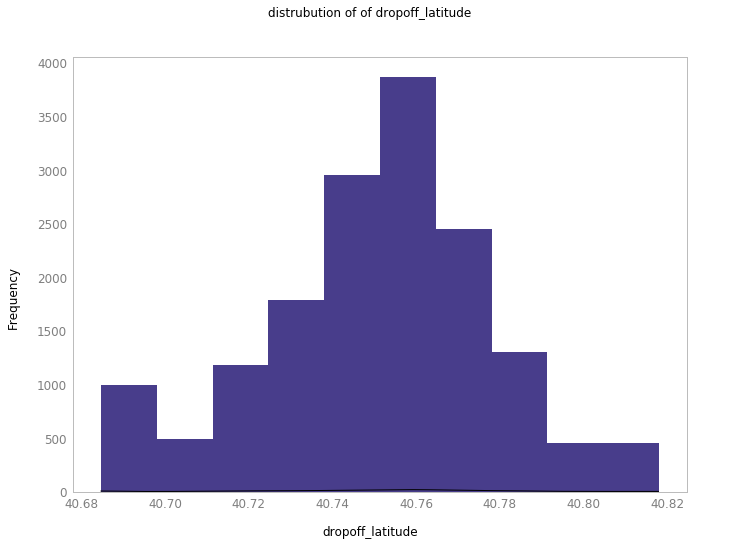

<ggplot: (187565062492)>

In [84]:
# dropoff_latitude
ggplot(Train_Cab,aes(x='dropoff_latitude')) + geom_histogram(fill="DarkSlateBlue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("dropoff_latitude") + ylab("Frequency") +ggtitle("distrubution of of dropoff_latitude")+\
   theme(text=element_text(size=20))

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


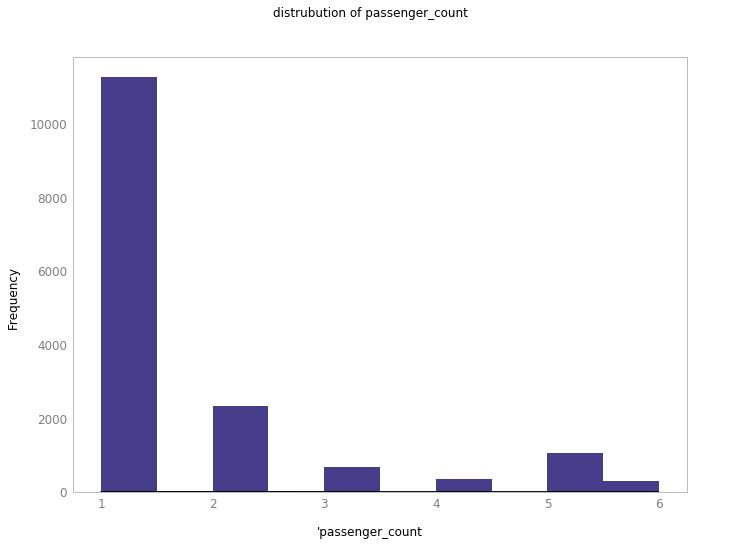

<ggplot: (-9223371849289493290)>

In [85]:
# passenger_count
ggplot(Train_Cab,aes(x='passenger_count')) + geom_histogram(fill="DarkSlateBlue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("'passenger_count") + ylab("Frequency") +ggtitle("distrubution of passenger_count")+\
   theme(text=element_text(size=20)) 


C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


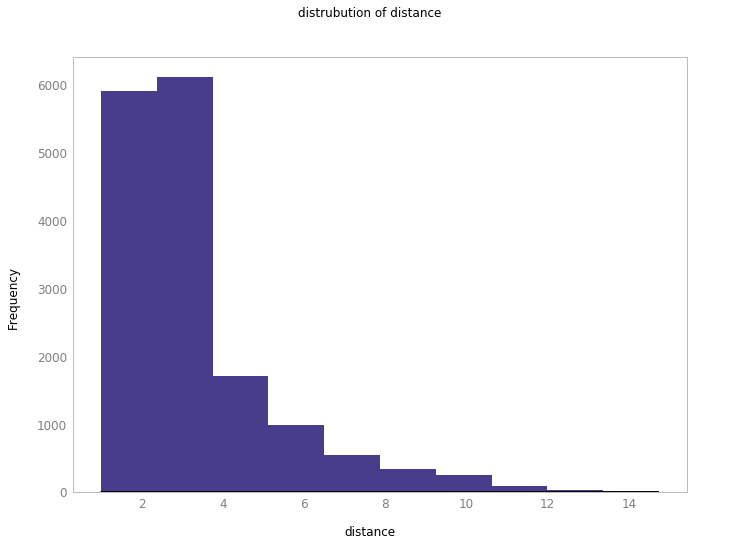

<ggplot: (187565310128)>

In [86]:
# distance
ggplot(Train_Cab,aes(x='distance')) + geom_histogram(fill="DarkSlateBlue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("distance") + ylab("Frequency") +ggtitle("distrubution of distance")+\
   theme(text=element_text(size=20)) # distribution is skewed 

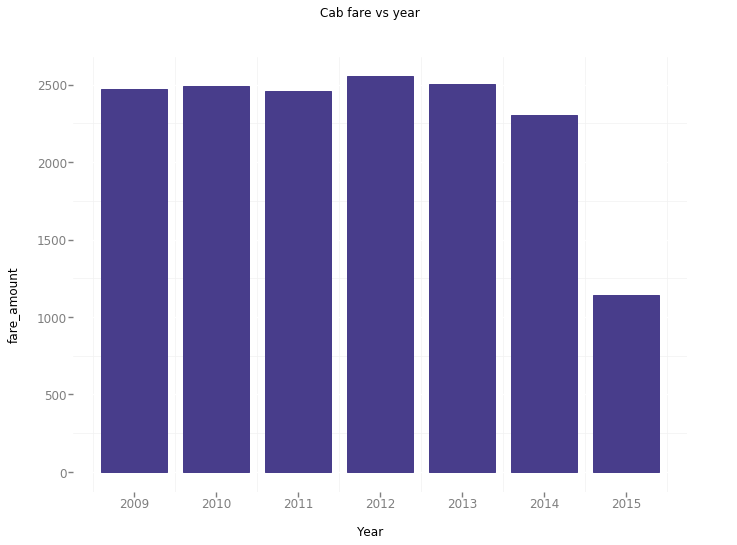

<ggplot: (187565282473)>

In [87]:
# Bivariate Analysis

# Lets plot barplot to know relation between target and categorical IV 

# Visualization between fare_amount and years.
ggplot(Train_Cab,aes(x='year',y='fare_amount'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("Year")+ylab("fare_amount") + ggtitle("Cab fare vs year")+ theme_bw()

# We can see, in year 2012 and 2013 there were rides which got high fare_amount and very low on year 2015

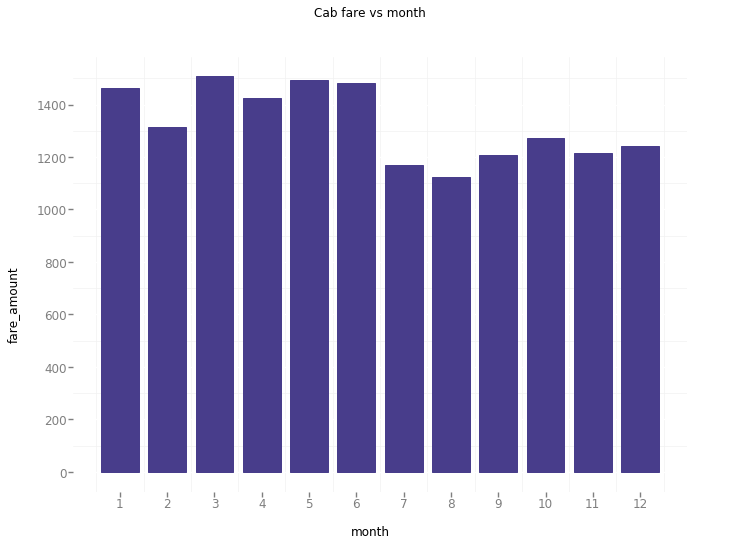

<ggplot: (187565298075)>

In [88]:
# Visualization between fare_amount and months.
ggplot(Train_Cab,aes(x='month',y='fare_amount'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("month")+ylab("fare_amount") + ggtitle("Cab fare vs month")+ theme_bw()
# We can see  March month fare amount is very high and low in July month.

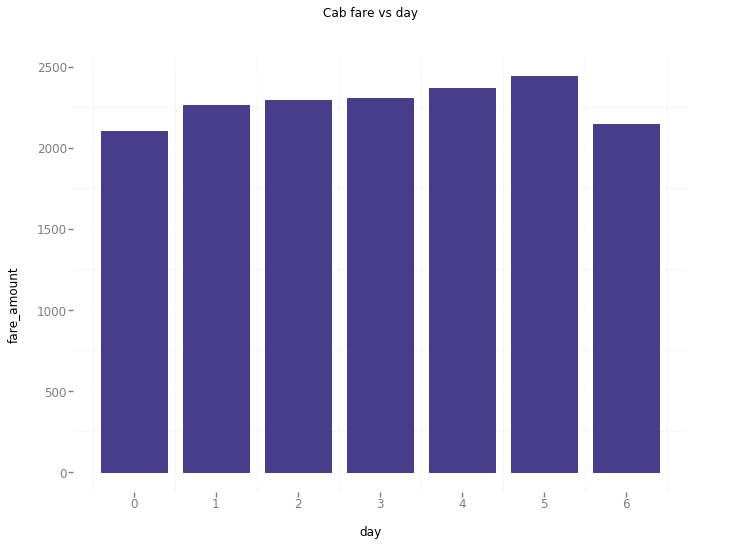

<ggplot: (187565282354)>

In [89]:
# Visualization between fare_amount and weekday.
ggplot(Train_Cab,aes(x='day',y='fare_amount'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("day")+ylab("fare_amount") + ggtitle("Cab fare vs day")+ theme_bw()

# We can see that Friday ride has the highest fare_amount

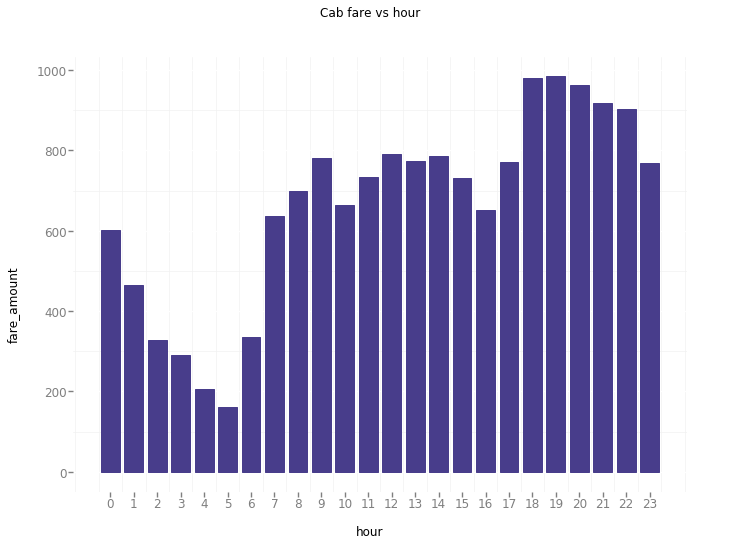

<ggplot: (187565387086)>

In [90]:
# Visualization between fare_amount and time.
ggplot(Train_Cab,aes(x='hour',y='fare_amount'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("hour")+ylab("fare_amount") + ggtitle("Cab fare vs hour")+ theme_bw()

# Rides taken during 6 pm to 8 pm gives highest fare_amount

In [91]:
# Lets plot scatter plot for target and continous variables 


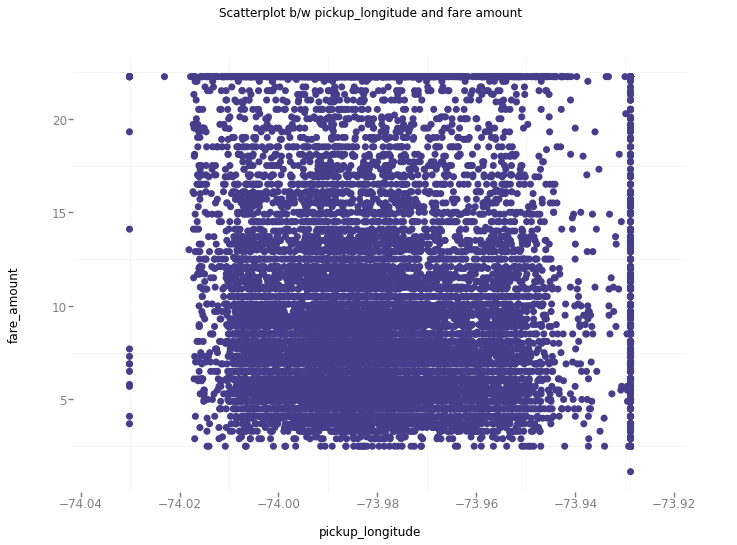

<ggplot: (-9223371849289330421)>

In [92]:
ggplot(aes(x="pickup_longitude",y="fare_amount"),data=Train_Cab)+\
  geom_point(alpha=1,size=50,color="DarkSlateBlue")+theme_bw()+ylab("fare_amount")+xlab("pickup_longitude")+ggtitle("Scatterplot b/w pickup_longitude and fare amount")


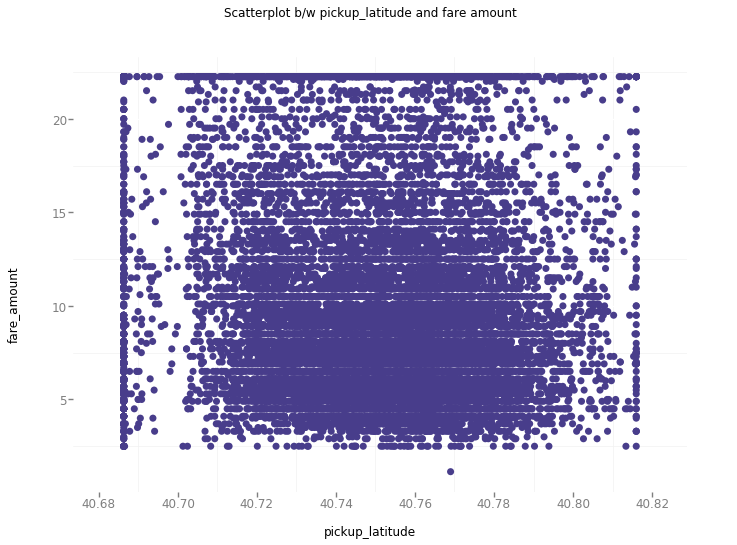

<ggplot: (187567981558)>

In [93]:
ggplot(aes(x="pickup_latitude",y="fare_amount"),data=Train_Cab)+\
  geom_point(alpha=1,size=50,color="DarkSlateBlue")+theme_bw()+ylab("fare_amount")+xlab("pickup_latitude")+ggtitle("Scatterplot b/w pickup_latitude and fare amount")


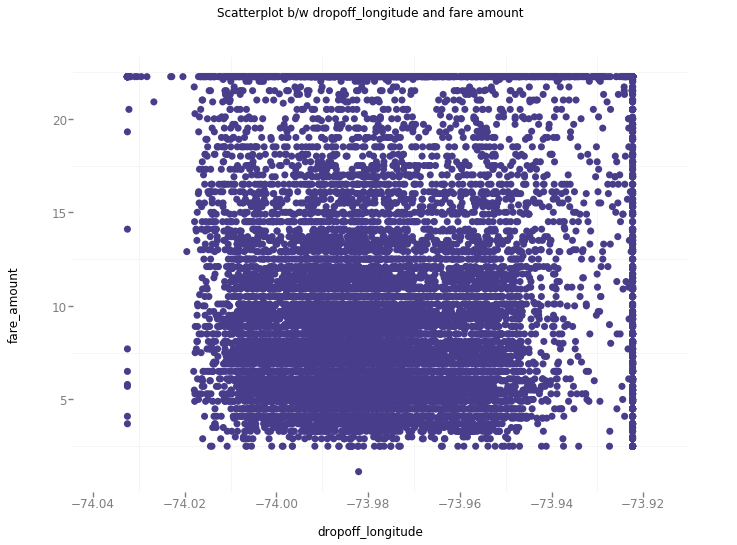

<ggplot: (187568002326)>

In [94]:
ggplot(aes(x="dropoff_longitude",y="fare_amount"),data=Train_Cab)+\
  geom_point(alpha=1,size=50,color="DarkSlateBlue")+theme_bw()+ylab("fare_amount")+xlab("dropoff_longitude")+ggtitle("Scatterplot b/w dropoff_longitude and fare amount")


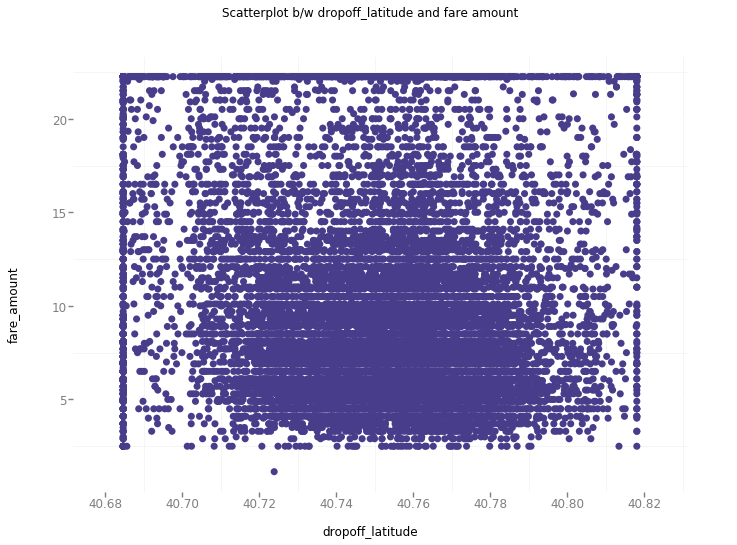

<ggplot: (-9223371849286773402)>

In [95]:
ggplot(aes(x="dropoff_latitude",y="fare_amount"),data=Train_Cab)+\
  geom_point(alpha=1,size=50,color="DarkSlateBlue")+theme_bw()+ylab("fare_amount")+xlab("dropoff_latitude")+ggtitle("Scatterplot b/w dropoff_latitude and fare amount")


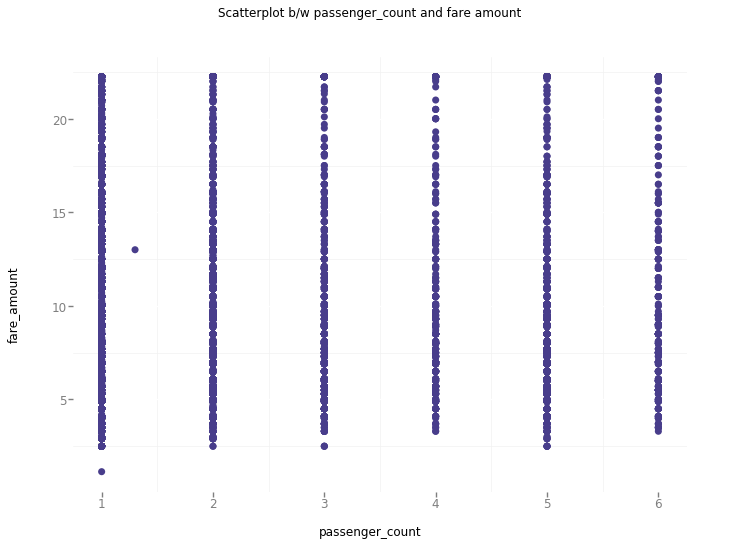

<ggplot: (-9223371849284857691)>

In [96]:
ggplot(aes(x="passenger_count",y="fare_amount"),data=Train_Cab)+\
  geom_point(alpha=1,size=50,color="DarkSlateBlue")+theme_bw()+ylab("fare_amount")+xlab("passenger_count")+ggtitle("Scatterplot b/w passenger_count and fare amount")

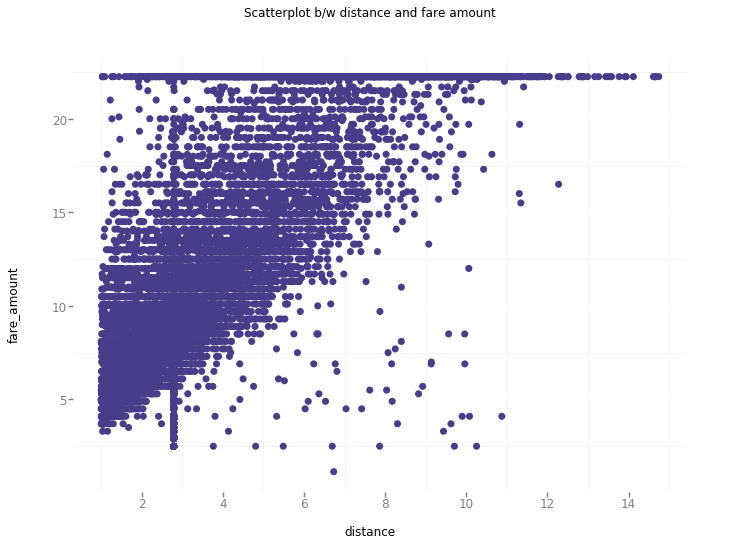

<ggplot: (187569918009)>

In [97]:
# fare_amount and distance.

ggplot(aes(x="distance",y="fare_amount"),data=Train_Cab)+\
  geom_point(alpha=1,size=50,color="DarkSlateBlue")+theme_bw()+ylab("fare_amount")+xlab("distance")+ggtitle("Scatterplot b/w distance and fare amount")

# we can see as the distance increases fare amount also slightli increases 

In [98]:
# Feature selection ------------------------------------------------------

In [99]:
print(Train_Cab.columns)


Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'date', 'day', 'hour', 'distance'],
      dtype='object')


In [100]:
Train_Cab.shape

(15923, 12)

In [101]:
Train_Cab.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1.0,2009,6,15,0,17,1.145091
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,1.999157


In [102]:
Train_Cab.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
year                   int64
month                  int64
date                   int64
day                    int64
hour                   int64
distance             float64
dtype: object

In [103]:
# Lets convert passenger_count into int64 data type
Train_Cab['passenger_count'] = Train_Cab['passenger_count'].astype('int64')


# Similarly convert year,month,date,day,hour as these comes under categorical variables 
Train_Cab['year'].unique()

Train_Cab['month'].unique()

Train_Cab['date'].unique()

Train_Cab['day'].unique()

Train_Cab['hour'].unique()

Train_Cab['year'] = Train_Cab['year'].astype('object')

Train_Cab['month'] = Train_Cab['month'].astype('object')

Train_Cab['date'] = Train_Cab['date'].astype('object')

Train_Cab['day'] = Train_Cab['day'].astype('object')

Train_Cab['hour'] = Train_Cab['hour'].astype('object')


In [104]:
Train_Cab.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                  object
month                 object
date                  object
day                   object
hour                  object
distance             float64
dtype: object

In [105]:
Train_Cab.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'date', 'day', 'hour', 'distance'],
      dtype='object')

In [106]:
# So lets define numeric and categorical variables to find significant variables to build a model

# Storing continuous variables into an  object called cnames 

cnames = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count','distance']

# Storing categorical variables into cat_var object

cat_var = ['year','month', 'date', 'day', 'hour']

In [107]:
##Correlation analysis
#Correlation plot

df_corr = Train_Cab.loc[:,cnames]


                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.146620        -0.112741   
pickup_longitude      0.146620          1.000000         0.260565   
pickup_latitude      -0.112741          0.260565         1.000000   
dropoff_longitude     0.234238          0.422544         0.040175   
dropoff_latitude     -0.104740          0.073255         0.513602   
passenger_count       0.014879         -0.005144        -0.002709   
distance              0.744530          0.096652        -0.121119   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.234238         -0.104740         0.014879   
pickup_longitude            0.422544          0.073255        -0.005144   
pickup_latitude             0.040175          0.513602        -0.002709   
dropoff_longitude           1.000000          0.251747        -0.008272   
dropoff_latitude            0.251747          1.000000        -0.002292 

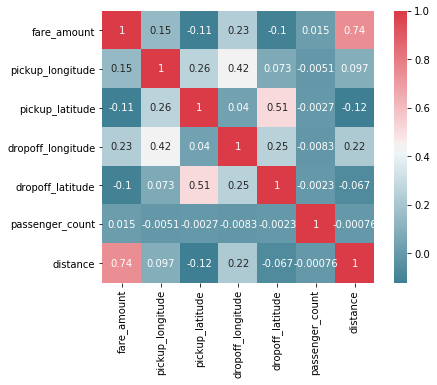

In [108]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

print(corr)# From correlation analysis we can say distance is significant variable to pass in to the model 

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [109]:
# Anova Test is performed between cat_var (categorical independent variables) & fare_amount(continuous target variable) 

import statsmodels.api as sm

from statsmodels.formula.api import ols

for i in cat_var:
    mod = ols('fare_amount' + '~' + i, data = Train_Cab).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)
    
# From the anova result, we can observe Date ,weekday

# has p value > 0.05, so delete these variables not consider in model.

                 sum_sq       df          F        PR(>F)
year       10776.029297      6.0  61.586495  7.841083e-76
Residual  464147.434204  15916.0        NaN           NaN
                 sum_sq       df         F        PR(>F)
month       1624.656818     11.0  4.965135  9.412829e-08
Residual  473298.806683  15911.0       NaN           NaN
                 sum_sq       df         F    PR(>F)
date         796.800278     30.0  0.890251  0.638527
Residual  474126.663224  15892.0       NaN       NaN
                 sum_sq       df         F    PR(>F)
day          298.801596      6.0  1.669995  0.123893
Residual  474624.661905  15916.0       NaN       NaN
                 sum_sq       df         F        PR(>F)
hour        3176.237993     23.0  4.654207  9.383642e-13
Residual  471747.225508  15899.0       NaN           NaN


In [110]:
Train_Cab.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'date', 'day', 'hour', 'distance'],
      dtype='object')

In [111]:
# After correlation and ANOVA test we need to remove these variables 

# Continous variables -"pickup_datetime"   "pickup_longitude"  "pickup_latitude"

# "dropoff_longitude" "dropoff_latitude"  "passenger_count"

# Cat variables - weekday and date

Drop_Catvar = ['date', 'day']

Train_Cab = Train_Cab.drop(Drop_Catvar , axis = 1)


In [112]:
# Lets cross check shape of dataset after feature selection
Train_Cab.shape

(15923, 10)

In [113]:
Train_Cab.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1,2009,6,17,1.145091
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,7,1.999157


In [114]:
# Storing final categorical variables into cat_var object for model development 
Cat_Var = ['year', 'month', 'hour',]

In [115]:
# Feature Scaling ---------------------------------------------------------

In [116]:
# Lets check whether our data is normally distributed or not 

In [117]:
Train_Cab.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'hour', 'distance'],
      dtype='object')

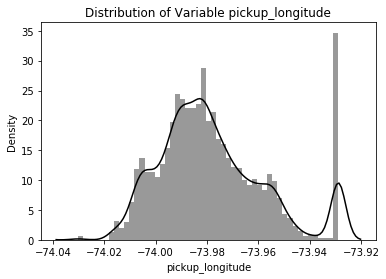

In [118]:
#pickup_longitude
sns.distplot(Train_Cab['pickup_longitude'],bins='auto',color='black')
plt.title("Distribution of Variable pickup_longitude")
plt.ylabel("Density")
plt.show()

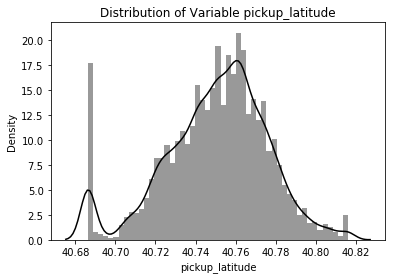

In [119]:
#pickup_latitude
sns.distplot(Train_Cab['pickup_latitude'],bins='auto',color='black')
plt.title("Distribution of Variable pickup_latitude")
plt.ylabel("Density")
plt.show()

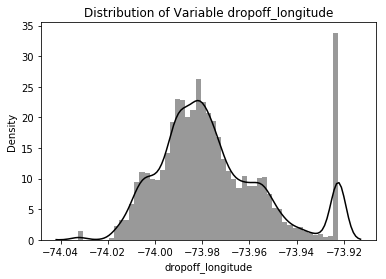

In [120]:
#dropoff_longitude
sns.distplot(Train_Cab['dropoff_longitude'],bins='auto',color='black')
plt.title("Distribution of Variable dropoff_longitude")
plt.ylabel("Density")
plt.show()

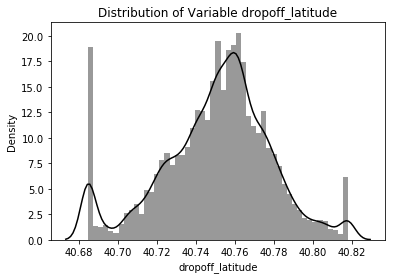

In [121]:
# dropoff_latitude
sns.distplot(Train_Cab['dropoff_latitude'],bins='auto',color='black')
plt.title("Distribution of Variable dropoff_latitude")
plt.ylabel("Density")
plt.show()

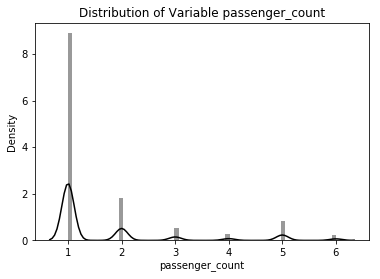

In [122]:
# passenger_count
sns.distplot(Train_Cab['passenger_count'],bins='auto',color='black')
plt.title("Distribution of Variable passenger_count")
plt.ylabel("Density")
plt.show()

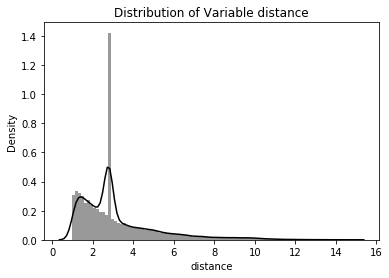

In [123]:
# distance variable
sns.distplot(Train_Cab['distance'],bins='auto',color='black')
plt.title("Distribution of Variable distance")
plt.ylabel("Density")
plt.show()

In [124]:
# The distance variable is right skewed we can reduce this skewness using log transformation
Train_Cab['distance'] = np.log(Train_Cab['distance'])

In [125]:
# Train_Cab['fare_amount'] = np.log(Train_Cab['fare_amount'])

In [126]:
Train_Cab.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance
0,4.5,-73.928847,40.721319,-73.922342,40.712278,1,2009,6,17,0.135484
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,2.134182
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,0,0.328962
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,1.029359
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,7,0.692725


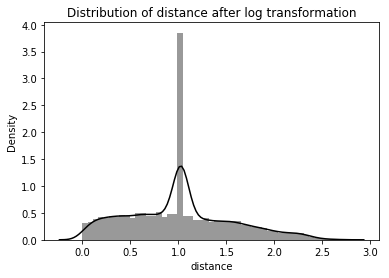

In [127]:
# We shall check for normality again after log transformation of distance variable

sns.distplot(Train_Cab['distance'],bins='auto',color='black')
plt.title("Distribution of distance after log transformation")
plt.ylabel("Density")
plt.show()

# We can observe now, after applying log function, the data is normalised

In [128]:
# Model development -------------------------------------------------------

In [129]:
# Load Required libraries for model development 

# For Machine learning 

from sklearn.model_selection import train_test_split #used to split dataset into train and test

from sklearn.metrics import mean_squared_error # used to calculate MSE

from sklearn.metrics import r2_score # used to calculate r square

from sklearn.linear_model import LinearRegression # For linear regression

from sklearn.tree import DecisionTreeRegressor # For Decision Tree

from sklearn.ensemble import RandomForestRegressor # For RandomForest

from sklearn import metrics

In [130]:
# Before developing the model lets check the dimensions of data 
Train_Cab.shape

(15923, 10)

In [131]:
Train_Cab.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'hour', 'distance'],
      dtype='object')

In [132]:
# Lets Divide the data into train and test set 

# Lets seperate independent and dependent variables 
X = Train_Cab[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'hour', 'distance']]

y = Train_Cab['fare_amount']

In [133]:
# Now Split the data into train and test using train_test_split function
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [134]:
Train_Cab.columns.get_loc('distance')

9

In [135]:
# Import libraries for LR 
# import statsmodels.api as sm 

# Train the model using the training sets 
# model = sm.OLS(Train_Cab.iloc[:,0],Train_Cab.iloc[:,0:9]).fit()

In [136]:
# lets create a object lm to build linear regression model 
lm = LinearRegression()

In [137]:
# fitting or building  a linear regression model 
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [138]:
#lets print the intercept 
print(lm.intercept_)

2646.985706351213


In [139]:
#lets print the coefficients of linear regression
lm.coef_

array([ 1.44380578e+01, -3.92007898e+00,  2.19005203e+01, -1.42442608e+01,
        6.90590034e-02,  3.89758002e-01,  7.51930583e-02,  1.28602582e-03,
        6.78503003e+00])

In [140]:
# Lets check independent variables of train data set
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'month', 'hour',
       'distance'],
      dtype='object')

In [141]:
# Lets print the summary model
summary_LR_Model = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [142]:
summary_LR_Model

,coeff
pickup_longitude,14.438058
pickup_latitude,-3.920079
dropoff_longitude,21.900520
dropoff_latitude,-14.244261
passenger_count,0.069059
year,0.389758
month,0.075193
hour,0.001286
distance,6.785030


In [143]:
# Predictions on test dataset 
predictions_LR =lm.predict(X_test)

print(predictions_LR) # these values are our predicted fare amount 

[ 6.14797872 18.54465411 12.91773135 ... 21.80113623 10.70385006
  4.91135499]


In [144]:
# lets have a glance on target variable actual values 
y_test.head()

11501     7.50
9322     22.25
14142    22.25
15120     6.50
1455      8.00
Name: fare_amount, dtype: float64

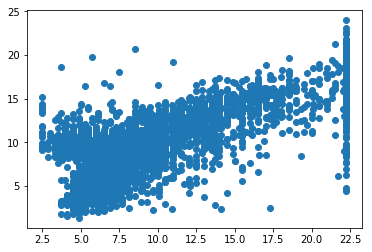

In [145]:
# Lets plot the actuals and predicted target variables 
plt.scatter(y_test,predictions_LR)

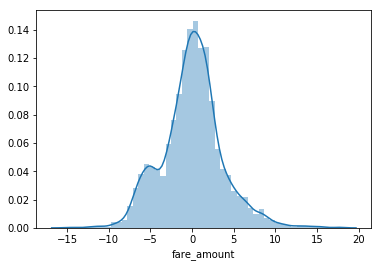

In [146]:
# lets check the distribution of our predictions
sns.distplot((y_test-predictions_LR))

In [147]:
# Regression Evaluation metrics 
# RMSE,Rsquare,MAPE

In [148]:
RMSE_LR = np.sqrt(metrics.mean_squared_error(y_test,predictions_LR))

print(RMSE_LR)

3.7024001373442332


In [149]:
r2_LR = metrics.r2_score(y_test,predictions_LR)

print(r2_LR)

0.5346052069178618


In [150]:
MAE_LR = metrics.mean_absolute_error(y_test,predictions_LR)
print(MAE_LR)

2.7535816407652414


In [151]:
# Calculate MAPE
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))
    return mape

In [152]:
MAPE_LR = MAPE(y_test,predictions_LR)

print(MAPE_LR)
## Error 37%

0.37177994935828523


In [153]:
LR_Results = {'RMSE':6.97,'r2_LR':0.49,'MAE_LR':4.15,'MAPE_LR':0.53}
print(LR_Results)

{'RMSE': 6.97, 'r2_LR': 0.49, 'MAE_LR': 4.15, 'MAPE_LR': 0.53}


In [154]:
#Decision Tree 

In [155]:
# Building DTModel on training data
fit_DT  = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

In [156]:
fit_DT 

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [157]:
# Apply model on test data
predictions_DT = fit_DT.predict(X_test)

In [158]:
predictions_DT

array([ 7.21659764, 19.69588006, 15.07506494, ..., 19.69588006,
        7.21659764,  7.21659764])

In [159]:
MAE_DT = metrics.mean_absolute_error(y_test,predictions_DT)

print(MAE_DT)

2.483768945252568


In [160]:
RMSE_DT = np.sqrt(metrics.mean_squared_error(y_test,predictions_DT))

print(RMSE_DT)

3.4077889882061343


In [161]:
r2_DT = metrics.r2_score(y_test,predictions_DT)

print(r2_DT)

0.6057241254794163


In [162]:
MAE_DT = metrics.mean_absolute_error(y_test,predictions_DT)
print(MAE_DT)

2.483768945252568


In [163]:
MAPE_DT = MAPE(y_test,predictions_DT)

print(MAPE_DT)


0.2914139123216866


In [164]:
DT_Results = {RMSE_DT,r2_DT,MAE_DT,MAPE_DT}

print(LR_Results)

{'RMSE': 6.97, 'r2_LR': 0.49, 'MAE_LR': 4.15, 'MAPE_LR': 0.53}


In [165]:
# Random Forest 

In [166]:
# Building RFModel on training data

RFModel = RandomForestRegressor(n_estimators = 200).fit(X_train, y_train)


In [167]:
# Apply model on test data

predictions_RF = RFModel.predict(X_test)


In [168]:
predictions_RF

array([ 8.2275, 20.5172, 15.8454, ..., 22.1225,  5.2045,  6.297 ])

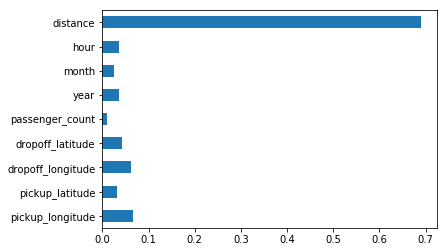

In [169]:
#Printing Feature importance of the model
feat_importances = pd.Series(RFModel.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')

In [170]:
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test,predictions_RF))

print(RMSE_RF)

2.639770051309667


In [171]:
r2_RF = metrics.r2_score(y_test,predictions_RF)

print(r2_RF)

0.7634151078088596


In [172]:
MAE_RF = metrics.mean_absolute_error(y_test,predictions_RF)

print(MAE_RF)

1.7213383765044479


In [173]:
MAPE_RF = MAPE(y_test,predictions_RF) 

print(MAPE_RF) #20% error

0.20464395125853155


In [174]:
Error_Metrics = {'RMSE':[RMSE_LR,RMSE_DT,RMSE_RF],
                  'r2':[r2_LR,r2_DT,r2_RF],
                     'MAE':[MAE_LR,MAE_DT,MAE_RF],
                   'MAPE':[MAPE_LR,MAPE_DT,MAPE_RF]}
                 

Final_Results_in_python =pd.DataFrame(Error_Metrics,index = ['Linear Regression', 'Decision Tree', 'Random Forest']) 

print(Final_Results_in_python)

                       RMSE        r2       MAE      MAPE
Linear Regression  3.702400  0.534605  2.753582  0.371780
Decision Tree      3.407789  0.605724  2.483769  0.291414
Random Forest      2.639770  0.763415  1.721338  0.204644


In [175]:
# From Final results we can freeze our data to Random forest model  as it has optimum values of error evaluation metrics 

# Model evaluation using new dataset test.csv  --------------------------------------------

In [176]:
# We will go through the same steps which we did for our Train_Cab dataset,
# and finally we will predict the target variable values using Random Forest 

In [177]:
# Import the test dataset 
Test_Cab = pd.read_csv("test.csv")

In [178]:
# Exploring  the  test data ------------------------------------------------------------------------------------------

# Check class of the data
type(Test_Cab)

pandas.core.frame.DataFrame

In [179]:
#Check the dimensions(no of rows and no of columns)
Test_Cab.shape

(9914, 6)

In [180]:
#Check names of dataset(no need of renaming variables)
Test_Cab.columns # we can see here there is no fare_amount varible we need to predict using RF_model

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [181]:
#Check top(first) rows of dataset 
Test_Cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [182]:
#Check bottom(last) rows of dataset 
Test_Cab.tail()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6


In [183]:
#Check structure of dataset(data structure of each variable)
Test_Cab.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [184]:
# we have to change pickup_datetime from object to datetime

Test_Cab['pickup_datetime'] =  pd.to_datetime(Test_Cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

print(Test_Cab.dtypes) # we can see out pickupdate time is converted to date format

# Let us see our data after data type conversion of variables

print(Test_Cab.head())

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object
      pickup_datetime  pickup_longitude  pickup_latitude  dropoff_longitude  \
0 2015-01-27 13:08:24        -73.973320        40.763805         -73.981430   
1 2015-01-27 13:08:24        -73.986862        40.719383         -73.998886   
2 2011-10-08 11:53:44        -73.982524        40.751260         -73.979654   
3 2012-12-01 21:12:12        -73.981160        40.767807         -73.990448   
4 2012-12-01 21:12:12        -73.966046        40.789775         -73.988565   

   dropoff_latitude  passenger_count  
0         40.743835                1  
1         40.739201                1  
2         40.746139                1  
3         40.751635                1  
4         40.744427                1  


In [185]:
# Lets split the pickup_date time variable into year, month, date, day, hour, minute.

Test_Cab['year'] =Test_Cab['pickup_datetime'].dt.year

Test_Cab['month'] = Test_Cab['pickup_datetime'].dt.month

Test_Cab['date'] = Test_Cab['pickup_datetime'].dt.day

Test_Cab['day'] = Test_Cab['pickup_datetime'].dt.dayofweek

Test_Cab['hour'] = Test_Cab['pickup_datetime'].dt.hour

In [186]:
# Lets cross check our test data
Test_Cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21


In [187]:
# Missing Value Analysis --------------------------------------------------

In [188]:
# Total number of missing values present in whole datset 
Test_Cab.isnull().sum() # no missing values 

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
dtype: int64

In [189]:
# Outlier analysis ------------------------------------
# lets check description of variables there we can figure out outliers easily
Test_Cab.describe() #no outliers 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


In [190]:
# Now, let's create distance using Haversine Formula 

# Calculates the geodesic distance between two points specified by

# radian latitude/longitude using the Haversine formula 

# we already defined these function in Train_cab dataset 

# Lets apply the function on logitudes and lattitudes to derive distance 


Test_Cab['distance'] = distance(Test_Cab['pickup_latitude'], 
                                     Test_Cab['pickup_longitude'],
                                     Test_Cab['dropoff_latitude'] ,
                                     Test_Cab['dropoff_longitude'])

In [191]:
# cross check few observation after creating new variable distance 
Test_Cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


In [192]:
# Lets check is there any outliers in this distance variable using describe function
Test_Cab['distance'].describe() # we can see 0 so delete such observations

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance, dtype: float64

In [193]:
Counter(Test_Cab['distance'] < 1)

Counter({False: 8418, True: 1496})

In [194]:
Test_Cab.loc[Test_Cab.distance < 1,'distance'] = Test_Cab['distance'].mean()

In [196]:
# Distance variable has values like 0's lets impute them with average distance
# Test_Cab.loc[Test_Cab.distance < 1,'distance'] = Test_Cab['distance'].mean()
print(Test_Cab['distance'].describe())


count    9914.000000
mean        3.856298
std         3.796927
min         1.000068
25%         1.811087
50%         3.103074
75%         4.045302
max        99.996040
Name: distance, dtype: float64


In [197]:
# Lets delete pickup_datetime as we derived year,month,date,day,hour,minute

In [198]:
Variables_To_Delete = ['pickup_datetime']
Test_Cab = Test_Cab.drop(Variables_To_Delete, axis = 1)

In [199]:
Test_Cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,3.435371
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


In [200]:
# During model development, we deleted few varaibles based on anova test and correlation analysis 

# The variables in the test case should exactly match with the variables in the trained model 

Test_Cab.columns



Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'month', 'date', 'day',
       'hour', 'distance'],
      dtype='object')

In [201]:
Test_Var_to_delete = ['date','day']

Test_Cab = Test_Cab.drop(Test_Var_to_delete, axis = 1)

print(Test_Cab.columns)

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'month', 'hour',
       'distance'],
      dtype='object')


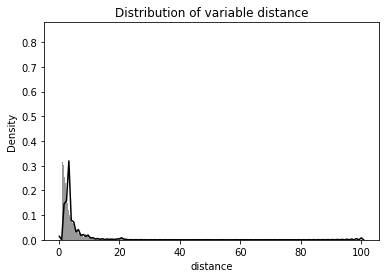

In [202]:
# Normalizing distance variable 

# We shall check for normality for distance. Let's first check about the skewness of the distance variable

sns.distplot(Test_Cab['distance'],bins='auto',color='black')
plt.title("Distribution of variable distance")
plt.ylabel("Density")
plt.show()

# We can observe, the variable is right skewed.

In [203]:
# Using log function to reduce the skewness in distance

Test_Cab['distance'] = np.log(Test_Cab['distance'])

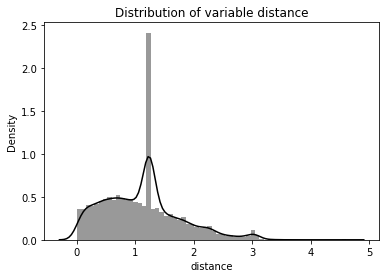

In [204]:
# We shall check for normality for distance after taking log function
sns.distplot(Test_Cab['distance'],bins='auto',color='black')
plt.title("Distribution of variable distance")
plt.ylabel("Density")
plt.show()

# We can observe now, after applying log function, the data is normalised

In [205]:
Test_Cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,0.842971
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,0.885977
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,1.234125
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,0.673471
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,1.684045


In [206]:
# Now lets apply our RF model on this Test_Cab data after cleaning this data 

predictions_Test_Cab = RFModel.predict(Test_Cab)

In [207]:
predictions_Test_Cab

array([10.135  , 10.1855 , 10.671  , ..., 20.40725, 20.34175,  7.4425 ])

In [208]:
# Fianlly creating new variable - Predicted Fare Amount

Test_Cab['Predicted_Fare_Amount'] = predictions_Test_Cab

In [209]:
# Lets see our data 
Test_Cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance,Predicted_Fare_Amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,0.842971,10.13500
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,0.885977,10.18550
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,1.234125,10.67100
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,0.673471,10.46650
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,1.684045,16.56975


In [210]:
Test_Cab['Predicted_Fare_Amount'].describe()

count    9914.000000
mean       11.207953
std         4.548066
min         4.643500
25%         7.655500
50%        10.138000
75%        13.369938
max        22.250000
Name: Predicted_Fare_Amount, dtype: float64

In [211]:
Test_Cab.head(6)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,distance,Predicted_Fare_Amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,13,0.842971,10.13500
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,13,0.885977,10.18550
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,11,1.234125,10.67100
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,21,0.673471,10.46650
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,21,1.684045,16.56975
5,-73.960983,40.765547,-73.979177,40.740053,1,2012,12,21,1.170173,10.75700


In [212]:
#save output results 
Test_Cab.to_csv("Cabfarepredicted.csv", index = False)